In [1]:
!pip install yfinance



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ticker_symbol = 'AAPL'
start_date = '2015-01-01'
end_date = '2025-01-01'

df = yf.download(ticker_symbol, start = start_date, end = end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320435,24.789804,23.879983,24.778681,212818400
2015-01-05,23.635283,24.169162,23.448426,24.089080,257142000
2015-01-06,23.637510,23.897776,23.274916,23.699796,263188400
2015-01-07,23.968967,24.069069,23.735394,23.846619,160423600
2015-01-08,24.889906,24.947743,24.180291,24.298190,237458000


In [4]:
df.to_csv("Stock Market Data.csv")

In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320435,24.789804,23.879983,24.778681,212818400
2015-01-05,23.635283,24.169162,23.448426,24.089080,257142000
2015-01-06,23.637510,23.897776,23.274916,23.699796,263188400
2015-01-07,23.968967,24.069069,23.735394,23.846619,160423600
2015-01-08,24.889906,24.947743,24.180291,24.298190,237458000


In [6]:
df.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   2516 non-null   float64
 1   (High, AAPL)    2516 non-null   float64
 2   (Low, AAPL)     2516 non-null   float64
 3   (Open, AAPL)    2516 non-null   float64
 4   (Volume, AAPL)  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


In [9]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,94.179887,95.094510,93.162752,94.092764,1.170867e+08
std,65.665066,66.260520,64.976048,65.584580,6.839957e+07
min,20.674532,20.978908,20.475431,20.596724,2.323470e+07
25%,35.343395,35.742684,34.964044,35.363680,7.105610e+07
50%,64.608200,65.164844,63.803511,64.448200,1.003646e+08
75%,150.747761,152.501732,148.774735,150.569881,1.426216e+08
max,258.735504,259.814335,257.347047,257.906429,6.488252e+08


In [10]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

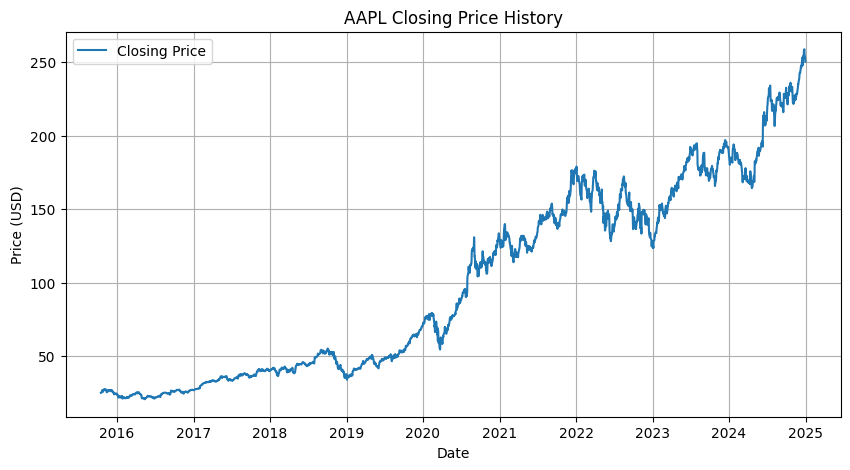

In [38]:

# Plot the closing price history
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Closing Price')
plt.title(f'{ticker} Closing Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


Uptrend: Bullish Trend, Stock is gaining value over time. It suggest positive market sentiment.
- There is a huge spike from 2020-2022.
- There is a slight downtrend in 2022-2023

# Feature Engineering #

Moving Average

In [11]:
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window = 200).mean()

Daily Returns

In [12]:
df['daily_returns'] = df['Close'].pct_change()
df['daily_returns'] 

Date
2015-01-02         NaN
2015-01-05   -0.028172
2015-01-06    0.000094
2015-01-07    0.014023
2015-01-08    0.038422
                ...   
2024-12-24    0.011478
2024-12-26    0.003176
2024-12-27   -0.013242
2024-12-30   -0.013263
2024-12-31   -0.007058
Name: daily_returns, Length: 2516, dtype: float64

VOLATILITY

Tendency to change quickly and unpredictably. More the price swing high will be the volatality

In [13]:
df['volatility'] = df['daily_returns'].rolling(window = 50).std()

**Removing NaN values. Since machine learning models can't handle NaN values**

NaN values occur because the moving averages and volatility calculations require past data points (first 49 will be NaN and first 199 will also be NaN)

In [14]:
df.isnull().sum()

Price          Ticker
Close          AAPL        0
High           AAPL        0
Low            AAPL        0
Open           AAPL        0
Volume         AAPL        0
50_MA                     49
200_MA                   199
daily_returns              1
volatility                50
dtype: int64

In [15]:
print(df[['50_MA', '200_MA', 'daily_returns', 'volatility']].isna().sum())


Price          Ticker
50_MA                     49
200_MA                   199
daily_returns              1
volatility                50
dtype: int64


In [16]:
df.dropna(inplace = True)

In [17]:
df.isnull().sum()

Price          Ticker
Close          AAPL      0
High           AAPL      0
Low            AAPL      0
Open           AAPL      0
Volume         AAPL      0
50_MA                    0
200_MA                   0
daily_returns            0
volatility               0
dtype: int64

In [18]:
df['200_MA'] 

Date
2015-10-16     27.177997
2015-10-19     27.182245
2015-10-20     27.192217
2015-10-21     27.202166
2015-10-22     27.212418
                 ...    
2024-12-24    211.182569
2024-12-26    211.614167
2024-12-27    212.039085
2024-12-30    212.437765
2024-12-31    212.829446
Name: 200_MA, Length: 2317, dtype: float64

In [19]:
#Normalizinng the data

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
scaled_data = scaler.fit_transform(df[['Close', '50_MA', '200_MA', 'daily_returns', 'volatility']])

scaled_df = pd.DataFrame(scaled_data, columns = ['Close', '50_MA', '200_MA', 'daily_returns', 'volatility'], index = df.index)
scaled_df

,Close,50_MA,200_MA,daily_returns,volatility
Date,,,,,
2015-10-16,0.018231,0.015826,0.020593,0.488283,0.366800
2015-10-19,0.018884,0.015747,0.020615,0.542799,0.367125
2015-10-20,0.020814,0.015622,0.020668,0.591274,0.355992
2015-10-21,0.020805,0.015628,0.020720,0.517434,0.325212
2015-10-22,0.022451,0.015633,0.020774,0.579350,0.325167
...,...,...,...,...,...
2024-12-24,0.996559,0.992071,0.991312,0.563985,0.085335
2024-12-26,1.000000,0.994430,0.993589,0.530569,0.083488
2024-12-27,0.985608,0.996662,0.995830,0.464490,0.086247


Text(0.5, 1.0, 'Correlation matrix of Stock Features')

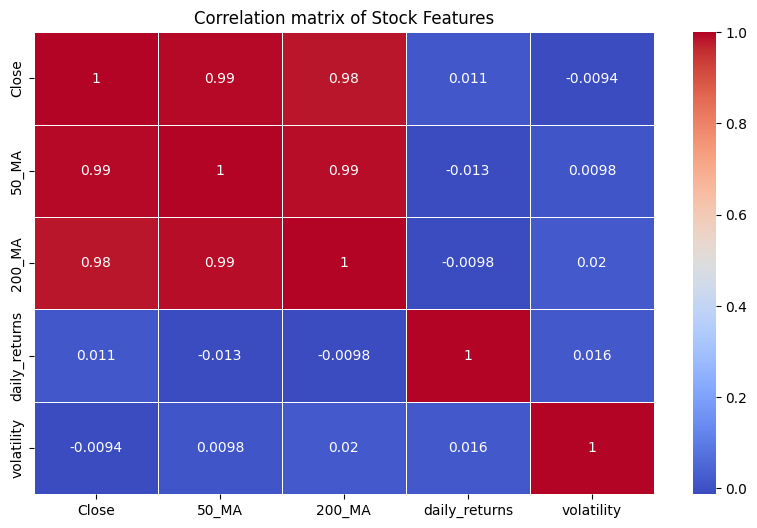

In [23]:
corr_matrix = scaled_df.corr()

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.title("Correlation matrix of Stock Features")

- Correlation b/w Close and 50 MA = 0.99(Very High)
- Close and 200 MA = 0.98 (Very High)
- 50 MA and 200 MA = 0.99 (Very High)
  There is a high correlation b/w them because moving averages are calculated using Close column

- Close vs Daily returns  = 0.11 (Almost zero)
- Close vs volatility = -0.0094 (Negligible)
- 200 Moving Avg vs daily returns = -0.0098 (Negligible)
- 200 MA vs Volatility = 0.02 (Almost zero)
- Daily returns and volatility are not highly correlated and will help in predictive model to gain good insights

  Redundancy happens when two or more features carry the same or very similar information, leading to:
  Multicollinearity
  Overfitting
  Decreased model performance

  So we will remove related columns. Among 50 Moving Avg and 200 day Moving Average only one will be considered to avoid redundancy
  
  

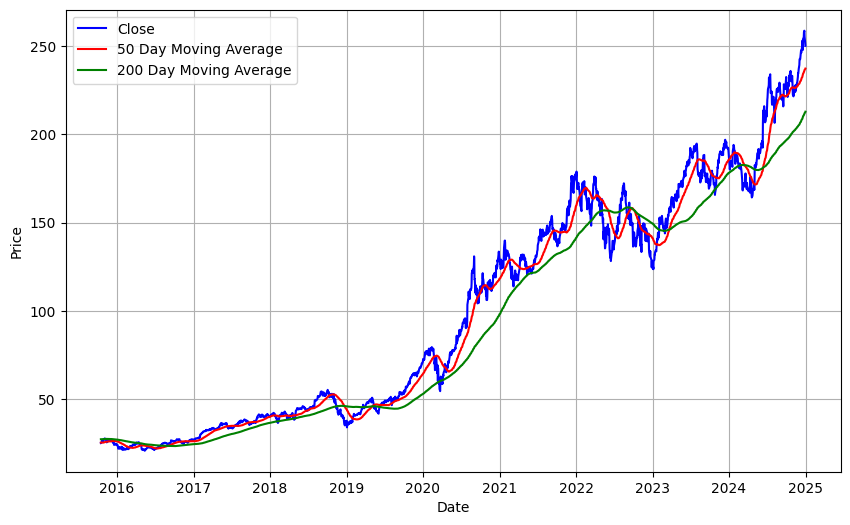

In [25]:
plt.figure(figsize = (10,6))

plt.plot(df['Close'], label = 'Close', color = 'Blue')
plt.plot(df['50_MA'], label = '50 Day Moving Average', color = 'Red')
plt.plot(df['200_MA'], label = '200 Day Moving Average',  color = 'Green')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

- There is strong uptrend in the stock prices from 2016-2015. It shows growth
- Between 2019-2025 there is a sharp increase in prices
- Mostly 50 Day Moving Average is above the 200 day Moving Average it confirms that Bullish(buy) trend it for the longer duration
- Bearish trend is in the year 2019 and 2022-2023 in 2024 there is bearish trend for a very short period of time
- 200 day Moving Average is more smoother and stable as comapred to 50 day moving trend
- Investor should remain invested as long as 50 day Moving Average is higher than 200 day since it shows consistent growth in the stocks
- When 50 day MA higher than 200 day MA it is Golden Cross else Death cross

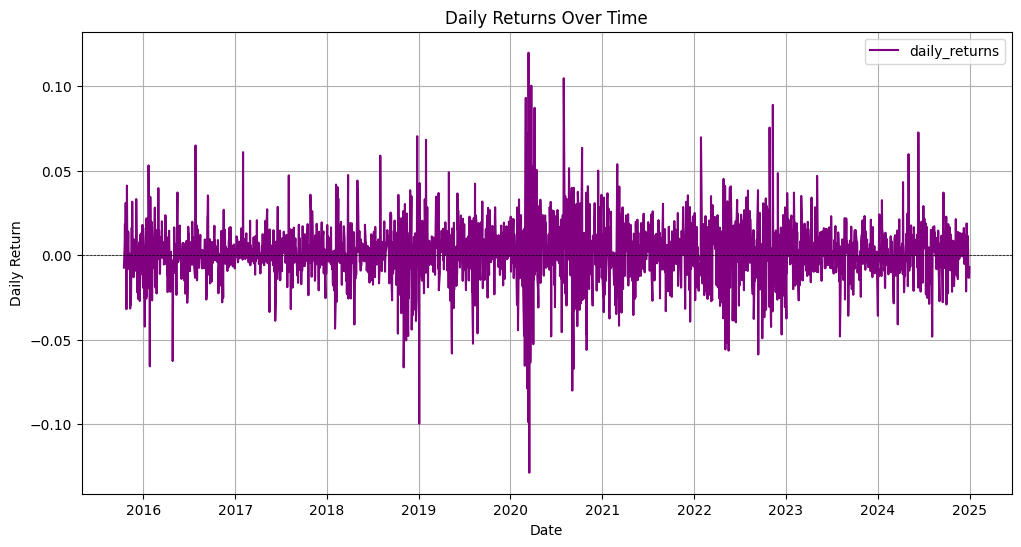

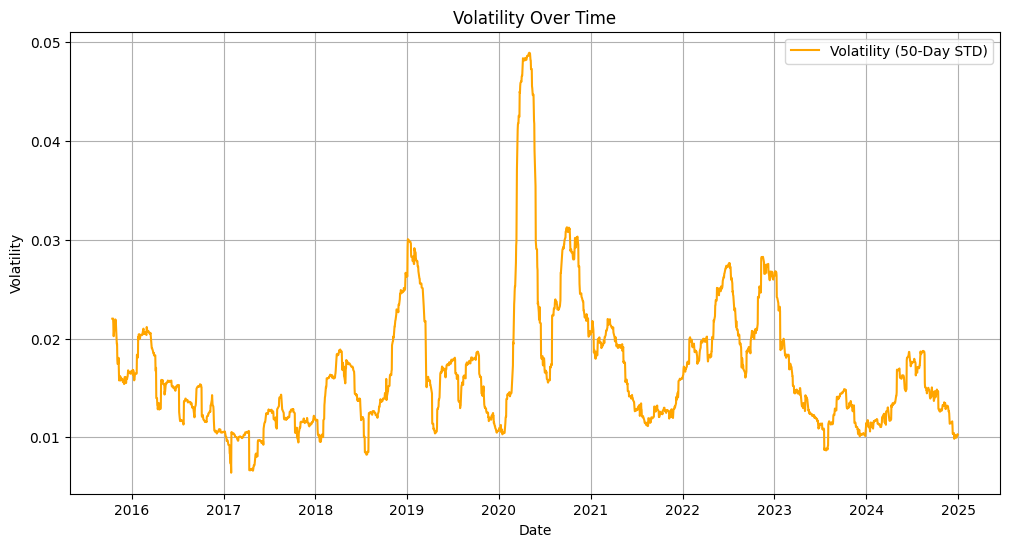

In [30]:
# Plot Daily Returns
plt.figure(figsize=(12,6))
plt.plot(df['daily_returns'], label = 'daily_returns', color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

# Plot Volatility
plt.figure(figsize=(12,6))
plt.plot(df['volatility'], label='Volatility (50-Day STD)', color='orange')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


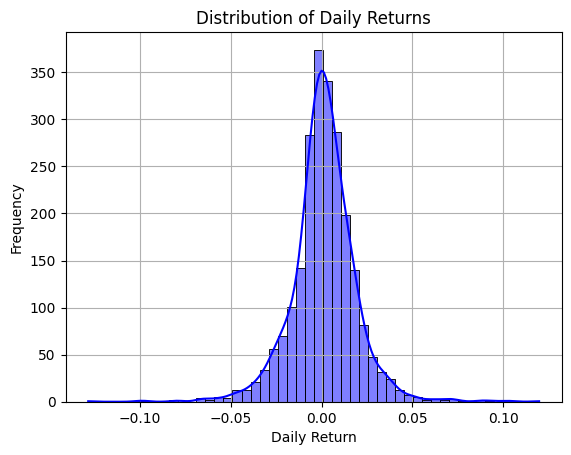

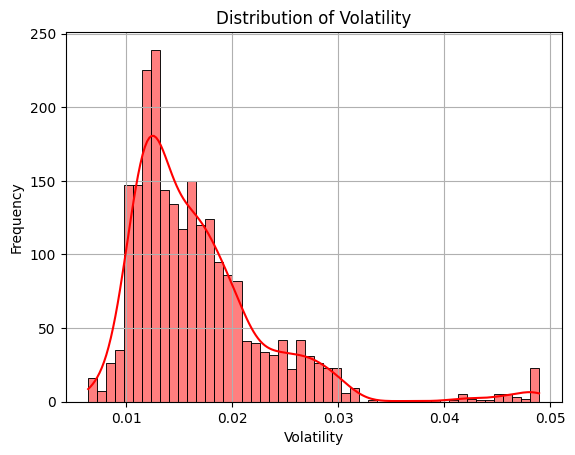

In [32]:
# Distribution of Daily Returns
sns.histplot(df['daily_returns'], bins=50, color='blue', kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of Volatility
sns.histplot(df['volatility'], bins=50, color='red', kde=True)
plt.title('Distribution of Volatility')
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Stock volatility is the rate at which a stock's price fluctuates over time. It's a measure of risk, and higher volatility means higher risk. 

Distribution of daily returns:
- Bell shaped curve or normal distribution which suggest that daily returns are close to 0. It is indicating that the stocks are stable there is small price change
- This graph is indicating low volatility so there is less risk and the price is not fluctuating. Daily returns are close to zero
- Suitable for models assuming normality, like Linear Regression or ARIMA.
  
Distrubution of Volatility:
- Right skewed there is a long tail on right side suggesting low volatility.
- After 0.03 there are very rare spikes
- Right skewed suggest mostly stable stocks only ocassionally there is a spike
- Suggests the need for models that can handle volatility clusters, like GARCH or LSTM with volatility features.

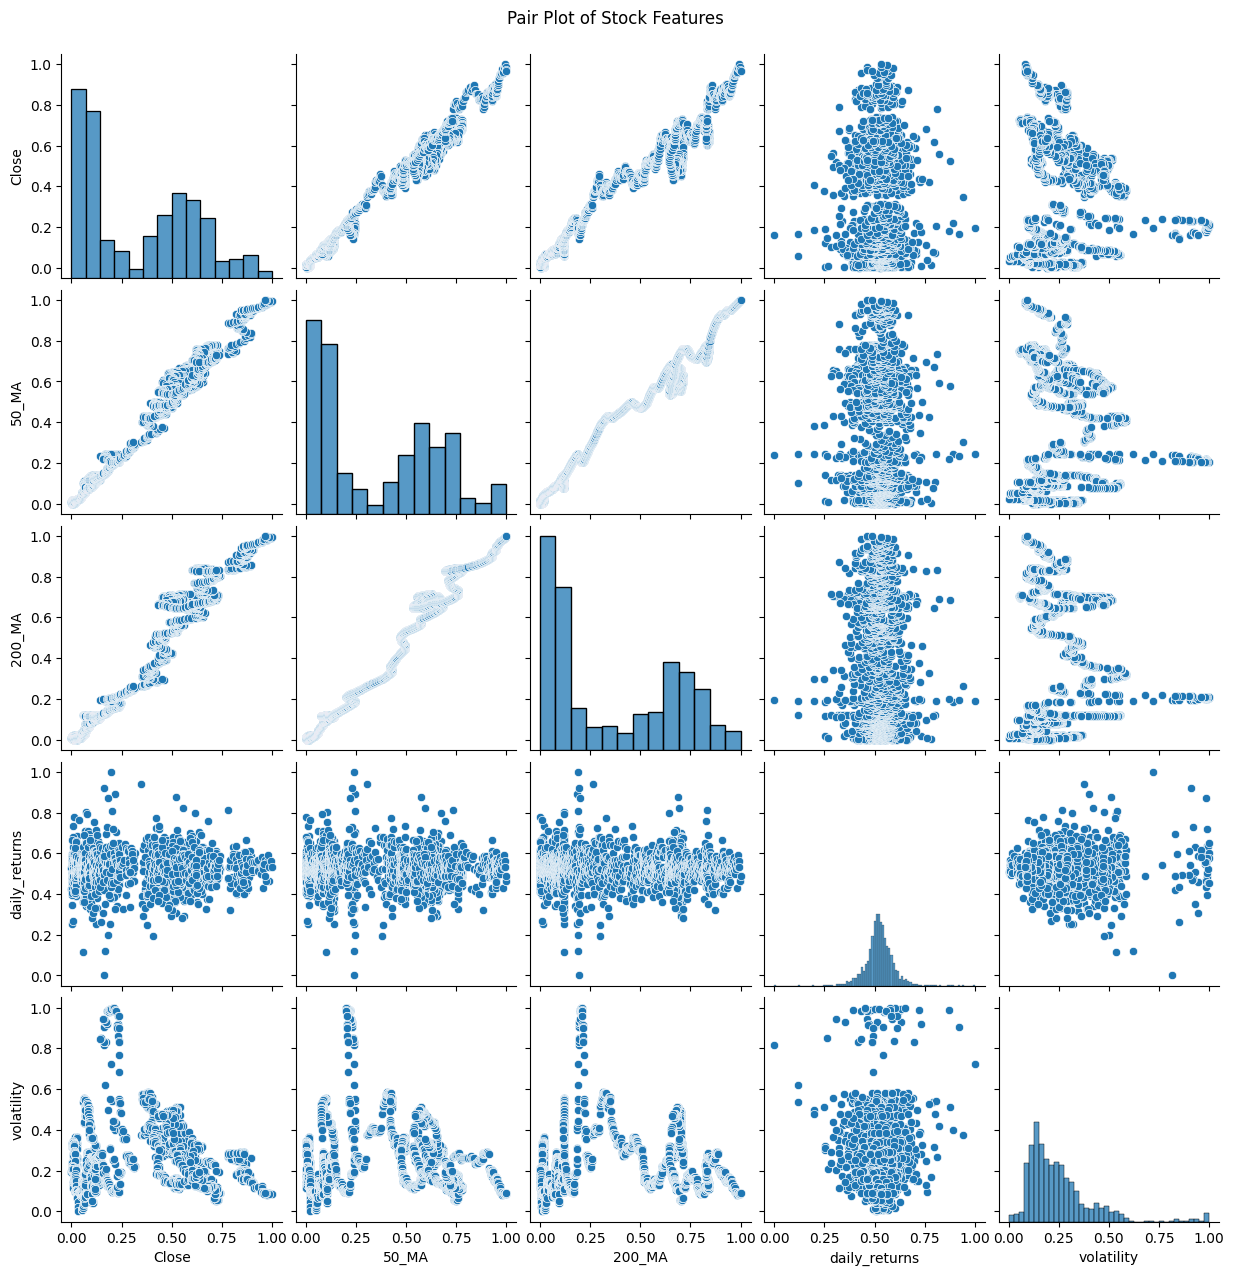

In [33]:
# Pair Plot of Scaled Features
sns.pairplot(scaled_df)
plt.suptitle('Pair Plot of Stock Features', y=1.02)
plt.show()


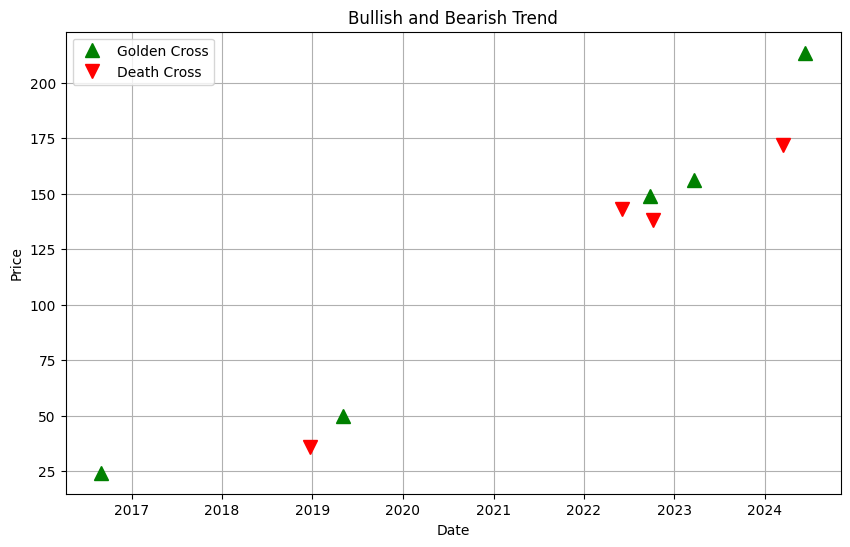

In [72]:
golden_cross = (df['50_MA']>df['200_MA']) & (df['50_MA'].shift(1)<=df['200_MA'].shift(1))
death_cross = (df['50_MA'] < df['200_MA'])  & (df['50_MA'].shift(1) >= df['200_MA'].shift(1))


plt.figure (figsize = (10,6))
plt.plot(df.index[golden_cross], df['Close'][golden_cross], '^', color = 'green', label = 'Golden Cross', markersize = 10)
plt.plot(df.index[death_cross], df['Close'][death_cross], 'v', color = 'red', label = 'Death Cross', markersize = 10)

plt.title("Bullish and Bearish Trend")
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

.shift(1) = previous day. Used to compare stock prices from previous day

- Price trend is increasing for 2017-2024 ensuring that people can invest for longer duration
- There are temporary death cross or downtrend but after sometime there is uptrend which indicated growth


# MODEL BUILDING

Mean Squared Error: 104.76420630932172
R² Score: 0.8396500611235378


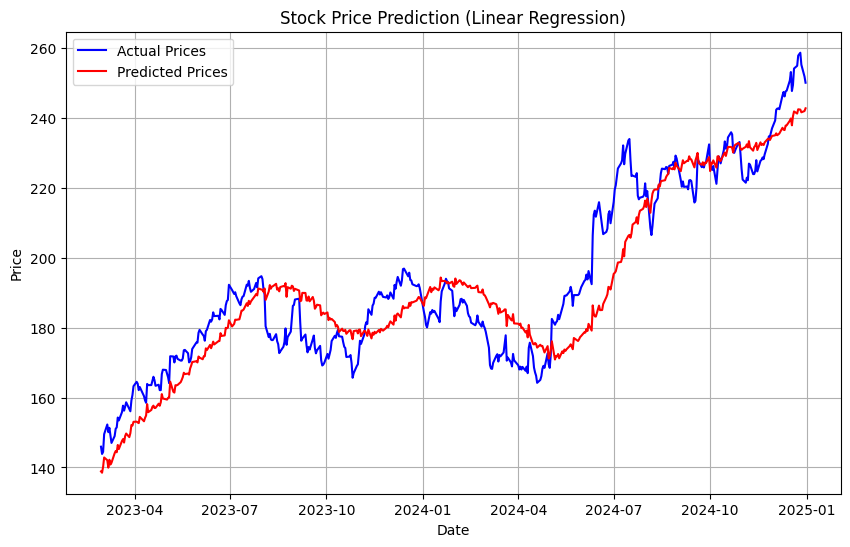

In [73]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define Target and Features
X = df[['50_MA', '200_MA', 'volatility', 'daily_returns']]  # Add more features as needed
y = df['Close']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and Train Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make Predictions
y_pred = lr_model.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Visualize Predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
